# Exploring categorical variables

In this Notebook we will explore relations with categorical (qualitative) variables. We will use a data set on apps on Google Play. This is a sample of the total data set.

In [164]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ufo.csv')
df.head(10)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


Which of these are categorical?
* app (strictly speaking)
* installs (even though it seems numerical, it's really categorical. We can't calculate a mean, for instance)
* type
* content
* genre
* version

A simple overview of a single variable can be easily done using Pandas' *value_counts*.

In [171]:
pd.value_counts(df["country"]).head(10)


us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [166]:
pd.value_counts(df["shape"]).head(10)


light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
Name: shape, dtype: int64

Let's say we are interested to know whether paid apps are marketed more towards mature audiences. We can make a crosstab of the two variables.

In [167]:
# df["duration"] = df["duration (seconds)"].mean 
# pd.crosstab(df["shape"], df["country"])



# df_sub = df[df["country"].isin(["us", "uk"])]
df_sub = df
# df_sub = df['shape'].value_counts().

It's hard to compare the different categories using absolute numbers. Let's use *normalized* data (in proportions):

In [168]:
table = pd.crosstab(df_sub["shape"],df_sub["country"], normalize="columns")*100

# columns gives proportion

All types of users have roughly the same distribution of Free/Paid content. *Column percentages* might also be useful (it's just proportions x 100). For your exercise, look up the documentation for this function and see if you can find out how.

This is a sample, so what conclusion can we draw for the population? In addition to the percentages, we need to take into account sample size. Percentages can easily shift with small numbers, e.g. 3/44 is a big difference from 2/43. So we can't draw any firm conclusions. However, it seems fair to say that paid apps are possibly marketed more towards a general audience.

Let's make a bar chart out of this data:

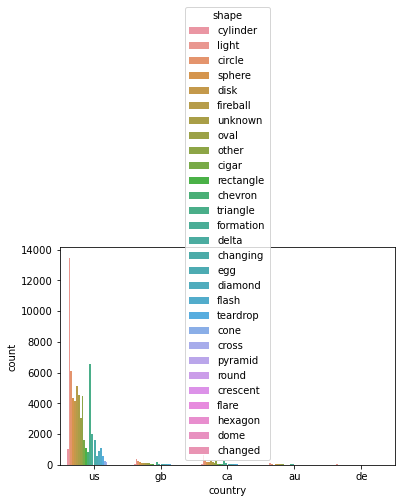

In [169]:
sns.countplot(x="country", hue="shape", data=df_sub)
plt.show()

This is a bar chart. In Seaborn this is a type of [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html). In the documentation (linked here) you can find all kinds of options.

The syntax is interesting here. The arguments are the different columns of the Pandas data frame. The same principle is applied in the [catplot](https://seaborn.pydata.org/tutorial/categorical.html). This type of plot includes all kinds of ways to investigate the relation between a *categorical* and a *numerical* variable.

TypeError: '<' not supported between instances of 'float' and 'str'

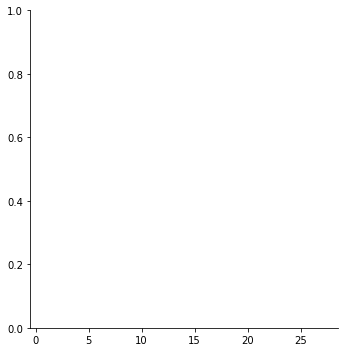

In [181]:
sns.catplot(x="shape", y="duration (seconds)", kind="swarm", data=df_sub)
# plt.title('File size of Google Play apps')
plt.show()

This *violin plot* (with box plot inside) shows that the distribution of the file size of free and paid apps is broadly similar, but that there are a bit more big free apps. Let's plot the actual data on it to learn more. A *swarmplot* plots the actual data points.

In [ ]:
sns.catplot(x="type", y="size", kind="violin", data=df)
sns.swarmplot(x="type", y="size", size=3, color="k", data=df)
plt.title('File size of Google Play apps')
plt.show()

The actual data support our interpretation that there might be more large free apps in the population (e.g., Facebook). Plus, it shows the limitations of the density model that is used for the violin plots. Obviously, file size can't go below zero. But the model doesn't know this.